In [113]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import io, signal
import pywt

In [114]:
file_path = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Probetas JI\probetas\2025 methodology\7\7.tif')

volume = io.load_tif(file_path)

In [115]:
rf = volume[:, np.random.randint(0, volume.shape[1]), np.random.randint(0, volume.shape[2])].astype(np.float16) - 128

In [116]:
envelope = signal.envelope(rf)

iq = signal.convert_to_IQ(rf)

In [117]:
#4281a4, #48a9a6, #e4dfda, #4c3b4d, #e980fc

In [118]:
# Enhanced Professional Plot Theme Configuration
# Color palette: #4281a4 (primary blue), #4c3b4d (deep purple), #48a9a6 (teal), #e4dfda (light beige), #e980fc (magenta)

def apply_plot_theme():
    """Apply the enhanced professional plot theme to current figure"""
    fig = plt.gcf()
    ax = plt.gca()
    
    # Set figure size and colors
    fig.set_size_inches(10, 6)
    fig.patch.set_facecolor('#f8f6f4')  # Slightly warmer white background
    ax.set_facecolor('#fdfcfb')  # Very light warm background for plot area
    
    # Configure enhanced grid
    ax.grid(True, axis='y', alpha=0.4, color='#e4dfda', linewidth=0.8, linestyle='-')
    ax.grid(True, axis='x', alpha=0.2, color='#e4dfda', linewidth=0.5, linestyle=':')
    ax.set_axisbelow(True)
    
    # Enhanced text styling with better contrast
    ax.tick_params(colors='#4c3b4d', labelsize=11, width=1.2)  # Deep purple tick labels
    ax.xaxis.label.set_color('#4c3b4d')  # Deep purple for better readability
    ax.yaxis.label.set_color('#4c3b4d')  # Deep purple for better readability
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)
    ax.xaxis.label.set_fontweight('medium')
    ax.yaxis.label.set_fontweight('medium')
    
    # Enhanced spine styling
    for spine in ax.spines.values():
        spine.set_color('#4c3b4d')
        spine.set_linewidth(1.3)
        spine.set_alpha(0.8)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Enhanced legend styling
    legend = ax.get_legend()
    if legend:
        legend.get_frame().set_facecolor('#fdfcfb')
        legend.get_frame().set_edgecolor('#4c3b4d')
        legend.get_frame().set_linewidth(1.2)
        legend.get_frame().set_alpha(0.95)
        for text in legend.get_texts():
            text.set_color('#4c3b4d')
            text.set_fontsize(11)
            text.set_fontweight('medium')
        # Add subtle shadow to legend
        legend.get_frame().set_boxstyle("round,pad=0.5")
    
    # Enhanced layout with better spacing
    plt.tight_layout(pad=2.5)
    
    # Subtle border around the entire plot
    fig.patch.set_linewidth(1)
    fig.patch.set_edgecolor('#e4dfda')

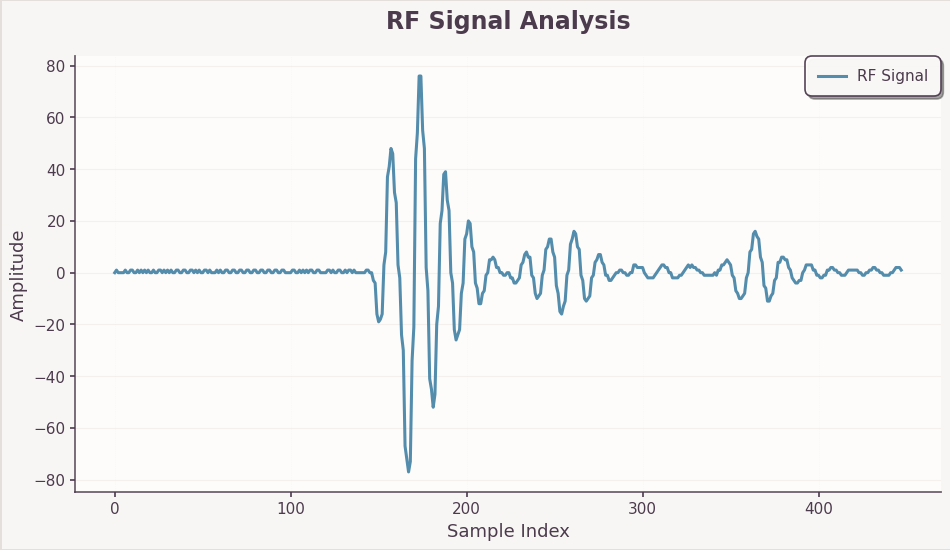

In [119]:
# Enhanced RF signal plot
plt.figure(figsize=(10, 6))
plt.plot(rf, label='RF Signal', color='#4281a4', linewidth=2.2, alpha=0.9)
plt.title('RF Signal Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.legend(frameon=True, fancybox=True, shadow=True)
apply_plot_theme()
plt.show()

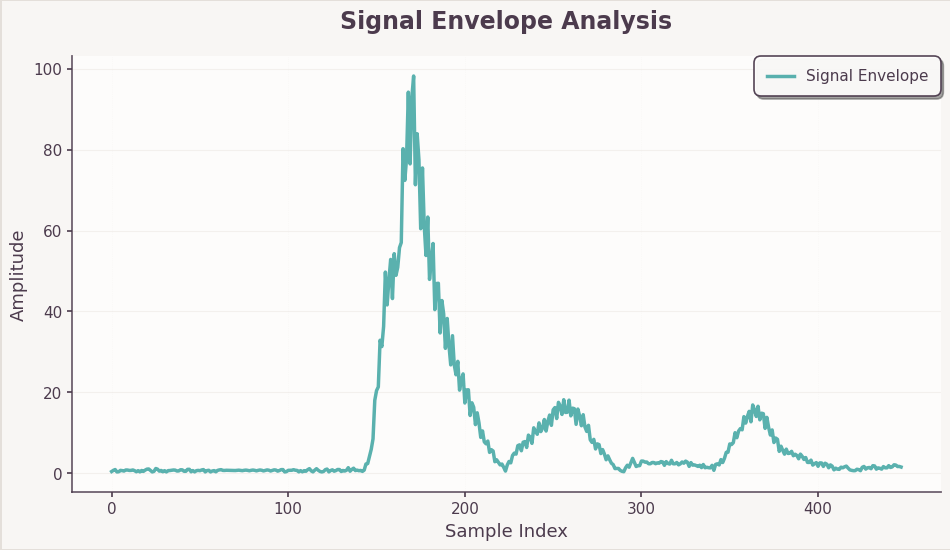

In [120]:
# Enhanced envelope plot
plt.figure(figsize=(10, 6))
plt.plot(envelope, label='Signal Envelope', color='#48a9a6', linewidth=2.5, alpha=0.9)
plt.title('Signal Envelope Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.legend(frameon=True, fancybox=True, shadow=True)
apply_plot_theme()
plt.show()

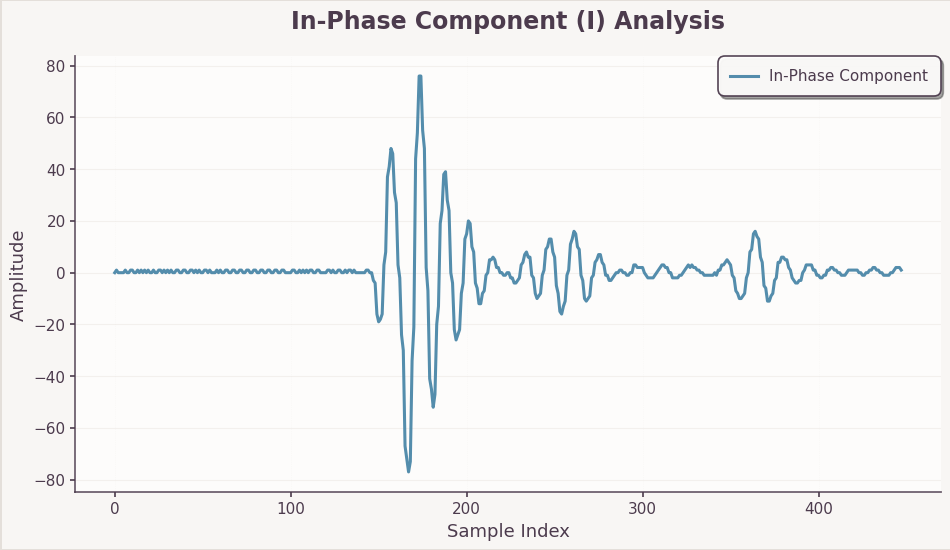

In [121]:
# Enhanced in-phase component plot
plt.figure(figsize=(10, 6))
plt.plot(iq[0], label='In-Phase Component', color='#4281a4', linewidth=2.2, alpha=0.9)
plt.title('In-Phase Component (I) Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.legend(frameon=True, fancybox=True, shadow=True)

# # Enhanced quadrature component plot
# plt.plot(iq[1], label='Quadrature Component', color='#e980fc', linewidth=2.2, alpha=0.9)
# plt.title('Quadrature Component (Q) Analysis', fontsize=17, color='#4c3b4d', pad=20, fontweight='semibold')
# plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
# plt.ylabel('Amplitude', fontsize=13, color='#4c3b4d', fontweight='medium')
# plt.legend(frameon=True, fancybox=True, shadow=True)
apply_plot_theme()
plt.show()

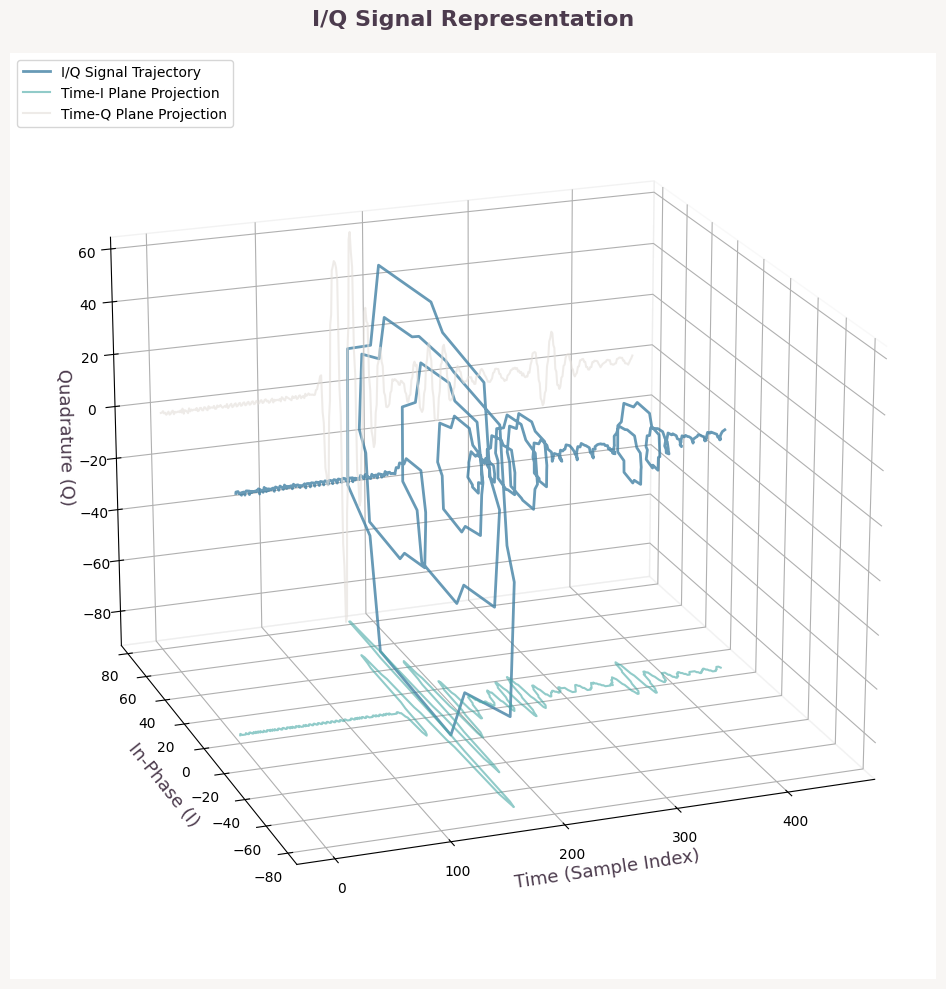

In [122]:
# 3D I/Q Signal Visualization
from mpl_toolkits.mplot3d import Axes3D

# Create time axis
time_axis = np.arange(len(iq[0]))

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D trajectory of the I/Q signal (time on X-axis, now pointing right)
ax.plot(time_axis, iq[0], iq[1], color='#4281a4', linewidth=2.0, alpha=0.8, label='I/Q Signal Trajectory')

# Add projections onto the coordinate planes for reference
ax.plot(time_axis, iq[0], np.min(iq[1]), color='#48a9a6', alpha=0.6, linewidth=1.5, label='Time-I Plane Projection')
ax.plot(time_axis, np.max(iq[0]), iq[1], color='#e4dfda', alpha=0.6, linewidth=1.5, label='Time-Q Plane Projection')

# Set the viewing angle (elevation, azimuth)
ax.view_init(elev=20, azim=-110)  # Adjust these values to rotate the plot

# Enhance the 3D plot appearance
ax.set_xlabel('Time (Sample Index)', fontsize=13, color='#4c3b4d', fontweight='medium')
ax.set_ylabel('In-Phase (I)', fontsize=13, color='#4c3b4d', fontweight='medium')
ax.set_zlabel('Quadrature (Q)', fontsize=13, color='#4c3b4d', fontweight='medium')
ax.set_title('I/Q Signal Representation', 
             fontsize=16, color='#4c3b4d', pad=20, fontweight='bold')

# Customize the 3D plot theme
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=10)

# Set background color
fig.patch.set_facecolor('#f8f6f4')

plt.tight_layout()
plt.show()

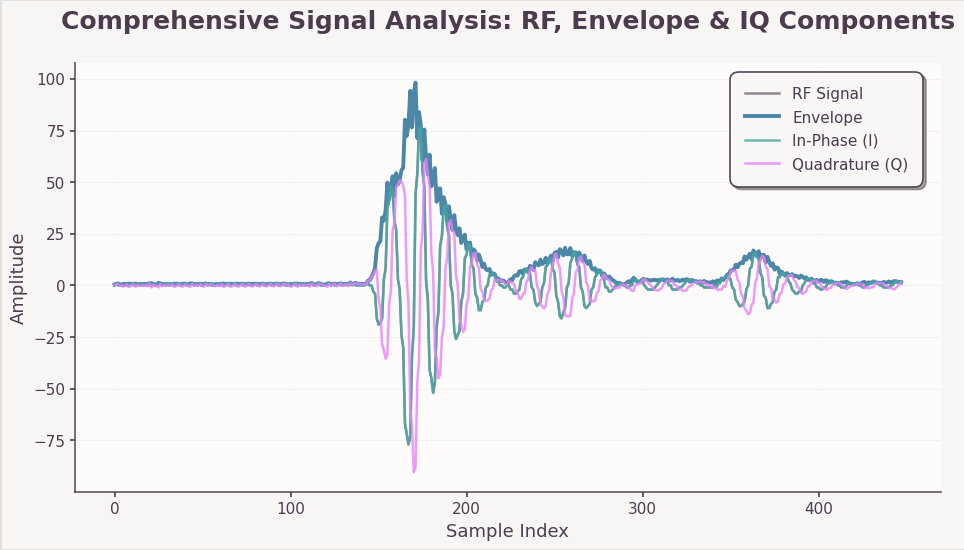

In [123]:
# Enhanced combined plot with optimal color distribution
plt.figure(figsize=(12, 7))
plt.plot(rf, label='RF Signal', color='#4c3b4d', linewidth=1.8, alpha=0.6, linestyle='-')
plt.plot(envelope, label='Envelope', color='#4281a4', linewidth=2.8, alpha=0.95)
plt.plot(iq[0], label='In-Phase (I)', color='#48a9a6', linewidth=1.8, alpha=0.8)
plt.plot(iq[1], label='Quadrature (Q)', color='#e980fc', linewidth=1.8, alpha=0.8)

plt.title('Comprehensive Signal Analysis: RF, Envelope & IQ Components', 
          fontsize=18, color='#4c3b4d', pad=25, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14, color='#4c3b4d', fontweight='medium')
plt.ylabel('Amplitude', fontsize=14, color='#4c3b4d', fontweight='medium')

# Enhanced legend with better positioning
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, 
          bbox_to_anchor=(0.98, 0.98), fontsize=12)

apply_plot_theme()
plt.show()

# Wavelet

Mexican Hat Wavelet

- The Mexican Hat wavelet, also known as the Ricker wavelet, is the second derivative of the Gaussian function
- It is symmetric and has a single vanishing moment, making it useful for detecting sharp transitions and singularities in signals
- The Mexican Hat wavelet has good time localization but relatively poor frequency localization
- It is often used in applications that require the detection of edges, peaks, or discontinuities in signals (image processing, pattern recognition)

In [124]:
import numpy as np

class Scaler:

    def __init__(self, scaling_type=0):
        self.type = scaling_type
        self.scaling_params = None

    def fit(self, data, scaling_type=None):
        if scaling_type is not None:
            self.type = scaling_type
        
        if self.type == 0:
            return self.min_max_scaler(data)
        elif self.type == 1:
            return self.standardize_data(data)
        elif self.type == 2:
            return self.robust_scale_data(data)
        else:
            raise ValueError("Invalid scaling type.")

    def undo(self, scaled_data):
        if self.scaling_params is None:
            raise ValueError("Scaling parameters are not set. Fit the data first.")
        
        if self.type == 0:
            return self.reverse_min_max_scaler(scaled_data)
        elif self.type == 1:
            return self.reverse_standardize_data(scaled_data)
        elif self.type == 2:
            return self.reverse_robust_scale_data(scaled_data)

    def min_max_scaler(self, data, range_min=0, range_max=1):
        data = data.copy()

        if self.scaling_params is not None:
            min_val = self.scaling_params['Min']
            max_val = self.scaling_params['Max']
        else:
            min_val = np.min(data)
            max_val = np.max(data)

        if max_val == min_val:
            raise ValueError("All values are the same. Cannot scale.")

        # Scale the data
        scaled_data = (data - min_val) / (max_val - min_val) * (range_max - range_min) + range_min

        self.scaling_params = {'Min': min_val, 'Max': max_val, 'Range Min': range_min, 'Range Max': range_max}
        self.type = 0
        
        return scaled_data

    def reverse_min_max_scaler(self, scaled_data):
        parameters = self.scaling_params
        min_val = parameters['Min']
        max_val = parameters['Max']
        range_min = parameters['Range Min']
        range_max = parameters['Range Max']

        # Reverse the scaling
        original_data = (scaled_data - range_min) / (range_max - range_min) * (max_val - min_val) + min_val
        
        return original_data

    def standardize_data(self, data):
        data = data.copy()
        
        if self.scaling_params is not None:
            mean = self.scaling_params['Mean']
            std = self.scaling_params['Std']
            max_abs_value = self.scaling_params['Max Abs']
        else:
            mean = np.mean(data)
            std = np.std(data)
            
            if std == 0:
                raise ValueError("Standard deviation is zero. Cannot scale.")
        
        print(f"Mean: {mean}, Std: {std}")
                
        # Standardize the data (mean=0, std=1)
        standardized_data = (data - mean) / std
        
        # Find the maximum absolute value to scale to [-1, 1]
        if self.scaling_params is None:
            max_abs_value = np.max(np.abs(standardized_data))
            
            if max_abs_value == 0:
                raise ValueError("Maximum absolute value is zero. Cannot scale to [-1, 1].")
        
        # Scale to [-1, 1]
        standardized_data = standardized_data / max_abs_value
        
        self.scaling_params = {'Mean': mean, 'Std': std, 'Max Abs': max_abs_value}
        self.type = 1
        
        return standardized_data

    def reverse_standardize_data(self, scaled_data):
        parameters = self.scaling_params
        mean = parameters['Mean']
        std = parameters['Std']
        max_abs_value = parameters['Max Abs']

        # Reverse the scaling to get back to standardized values
        standardized_data = scaled_data * max_abs_value
        
        # Reverse the standardization
        original_data = standardized_data * std + mean
        
        return original_data

    def robust_scale_data(self, data):
        if self.scaling_params is not None:
            median = self.scaling_params['Median']
            iqr = self.scaling_params['IQR']
        else:
            median = np.median(data)
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1

        if iqr == 0:
            raise ValueError("IQR is zero. Cannot scale.")

        scaled_data = (data - median) / iqr

        self.scaling_params = {'Median': median, 'IQR': iqr}
        self.type = 2
        
        return scaled_data

    def reverse_robust_scale_data(self, scaled_data):
        parameters = self.scaling_params
        median = parameters['Median']
        iqr = parameters['IQR']

        original_data = scaled_data * iqr + median
        
        return original_data


Mean: 0.3459821343421936, Std: 13.452908515930176


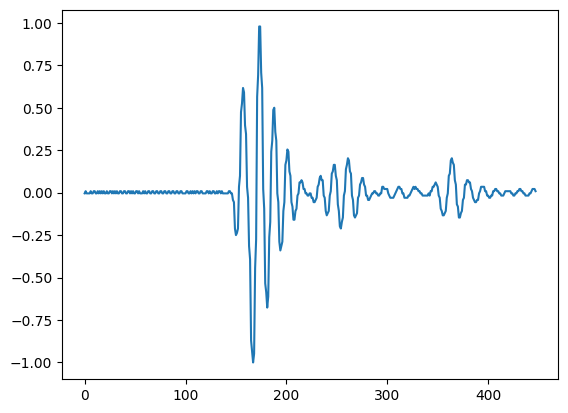

In [125]:
scaler = Scaler()

rf_scaled = scaler.fit(rf.astype(np.float32), scaling_type=1)

plt.plot(rf_scaled)

In [133]:
#convert from scale to frequency
#multiply by the sampling frequency(MHz) to understand better
pywt.scale2frequency('mexh',6) * 67

2.7916666666666665

In [148]:
def continuous_wavelet_transform(data,wavelet='mexh', num_scales=64, axis=-1):
    import pywt
    # Define scales for the wavelet transform
    scales = np.geomspace(0.8, 6, num_scales)
    # Perform continuous wavelet transform
    coef, freqs = pywt.cwt(data, scales, wavelet, axis=axis)
    return coef, freqs, scales

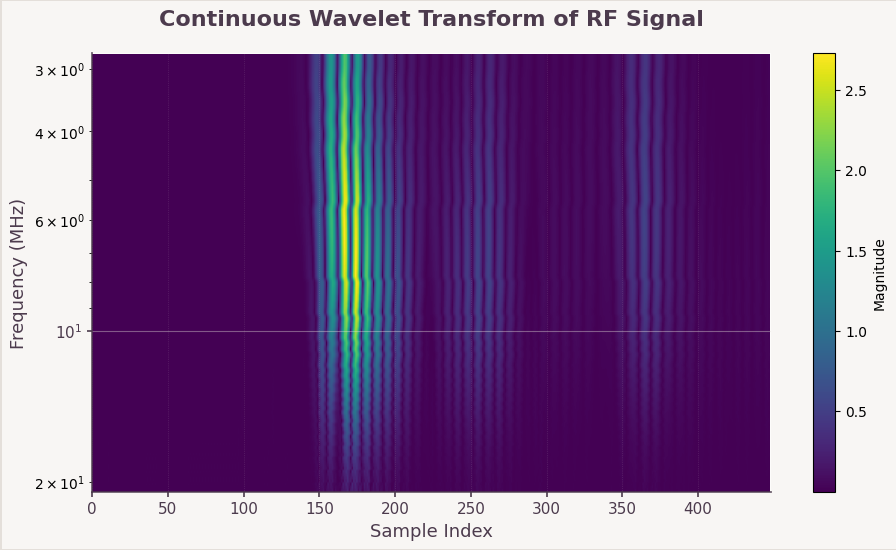

CWT coefficient matrix shape: (64, 448)
Frequency range: 2.7917 to 20.9375
Scale range: 0.80 to 6.00


In [141]:
# Continuous Wavelet Transform of RF Signal
import numpy as np
import matplotlib.pyplot as plt

# Use your RF signal instead of the test signal
signal_data = rf_scaled.astype(np.float64)  # Convert to float64 for better precision

# Perform continuous wavelet transform
coef, freqs, scales = continuous_wavelet_transform(signal_data,'mexh',64)

freqs = freqs * 67

# Create the wavelet transform plot
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coef), aspect='auto', cmap='viridis', origin='lower',
           extent=[0, len(signal_data), freqs[0], freqs[-1]])
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform of RF Signal', 
          fontsize=16, color='#4c3b4d', pad=20, fontweight='bold')
plt.xlabel('Sample Index', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.ylabel('Frequency (MHz)', fontsize=13, color='#4c3b4d', fontweight='medium')
plt.yscale('log')
apply_plot_theme()
plt.show()

print(f"CWT coefficient matrix shape: {coef.shape}")
print(f"Frequency range: {freqs.min():.4f} to {freqs.max():.4f}")
print(f"Scale range: {scales.min():.2f} to {scales.max():.2f}")

In [155]:
data = volume.copy()
data = data.astype(np.float32)  # Convert to float32 for processing
data = data - 128
scaler = Scaler()
data_scaled = scaler.fit(data, scaling_type=1)
coefs,freqs,scales = continuous_wavelet_transform(data_scaled,'mexh',64,0)

Mean: 0.37148886919021606, Std: 10.983757972717285


In [156]:
coefs.shape

(64, 448, 126, 51)

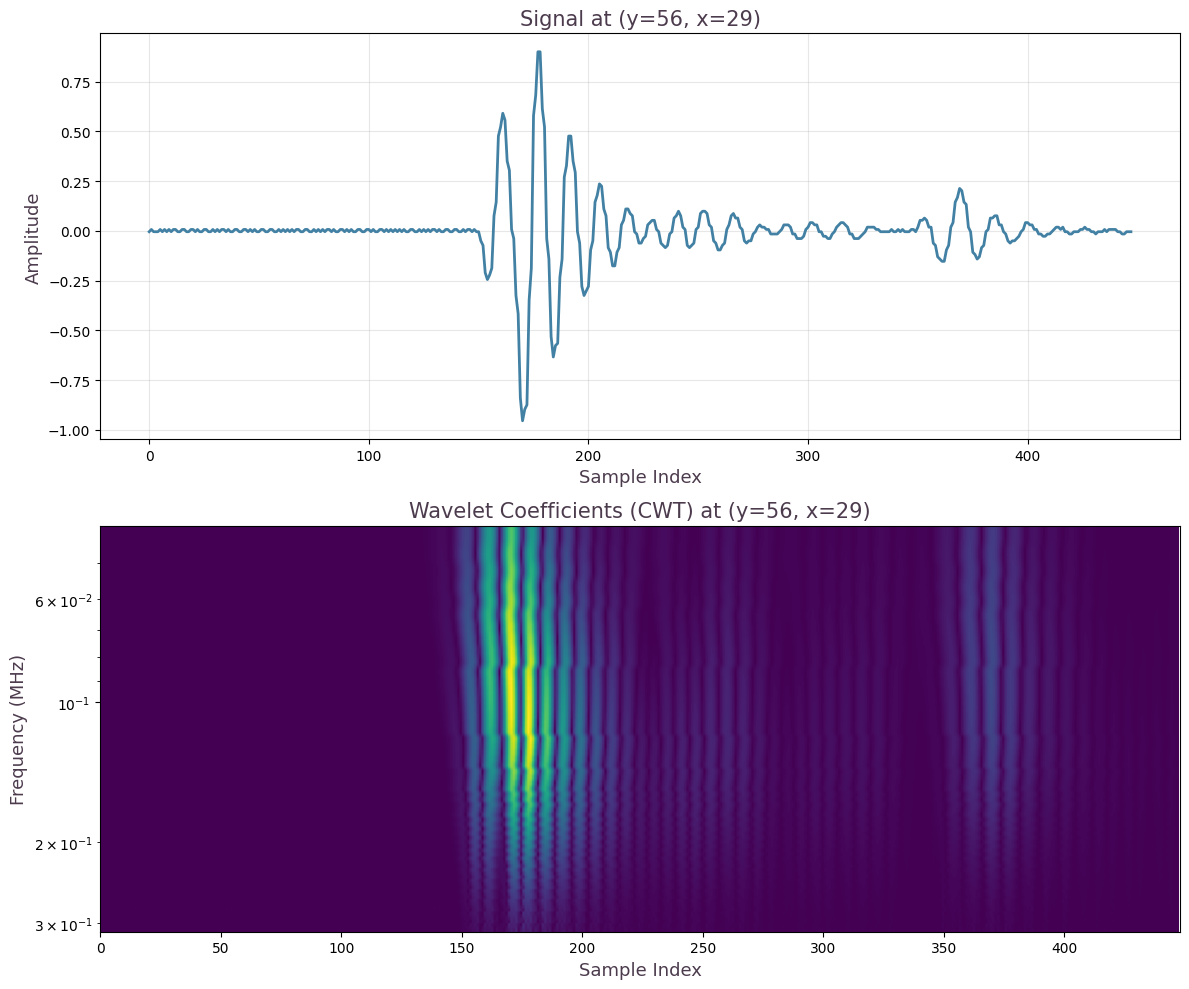

In [166]:
x = np.random.randint(0, data.shape[2])
y = np.random.randint(0, data.shape[1])

signal_data = data_scaled[:,y,x]
wavelet = coefs[:,:,y,x]

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the signal
axs[0].plot(signal_data, color='#4281a4', linewidth=2)
axs[0].set_title('Signal at (y={}, x={})'.format(y, x), fontsize=15, color='#4c3b4d')
axs[0].set_xlabel('Sample Index', fontsize=13, color='#4c3b4d')
axs[0].set_ylabel('Amplitude', fontsize=13, color='#4c3b4d')
axs[0].grid(True, alpha=0.3)

# Plot the wavelet coefficients (CWT)
im = axs[1].imshow(np.abs(wavelet), aspect='auto', cmap='viridis', origin='lower',
                   extent=[0, wavelet.shape[1], freqs[0], freqs[-1]])
axs[1].set_title('Wavelet Coefficients (CWT) at (y={}, x={})'.format(y, x), fontsize=15, color='#4c3b4d')
axs[1].set_xlabel('Sample Index', fontsize=13, color='#4c3b4d')
axs[1].set_ylabel('Frequency (MHz)', fontsize=13, color='#4c3b4d')
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()